In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [109]:
df = pd.read_excel("House_Sold_Price.xlsx",header=7, nrows=38)

df = df.set_axis(['Year', "Median Sales Price: US", "Median Sales Price: North-East", "Median Sales Price: MidWest","Median Sales Price: South", "Median Sales Price: West", "Average Sales Price: US",  "Average Sales Price: North-East", "Average Sales Price: MidWest","Average Sales Price: South" ,"Average Sales Price: West"], axis=1, inplace=False)
my_columns = df.columns.tolist()
df['Median Sales Price: North-East'][7] = df['Median Sales Price: North-East'][7] * 10

In [129]:
inflation_df = pd.read_csv("Inflation_1978_2015.csv", header=None, names=["Year", "Average Rate"])

House Data from:
http://web.archive.org/web/20170222041424/http://www.census.gov/construction/chars/sold.html


Inflation Data from:
https://inflationdata.com/articles/inflation-adjusted-prices/inflation-adjusted-housing-prices/

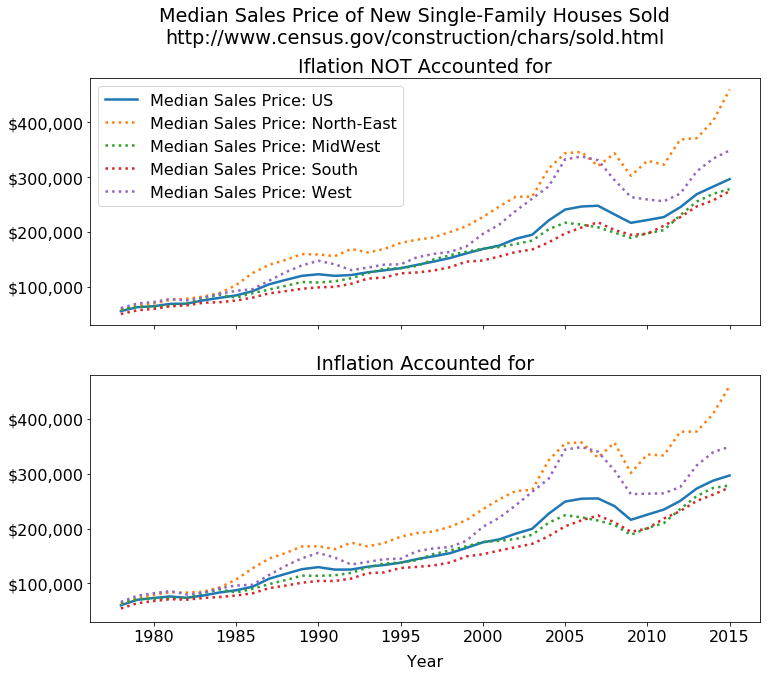

In [409]:
line_style = ["-", ":", ":" , ":", ":"];
fig, axs = plt.subplots(2, sharex=True,sharey=True ,figsize=(12,10))
for i in range(1, 6):
    axs[0].plot(df.Year, df.iloc[:,i], label=my_columns[i], linewidth=2.5, linestyle=line_style[i-1])
    axs[1].plot(df.Year, df.iloc[:,i]*(1 + (inflation_df["Average Rate"].values / 100)), label=my_columns[i], linewidth=2.5, linestyle=line_style[i-1])


    
axs[0].legend()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axs[0].yaxis.set_major_formatter(tick)
plt.xlabel('Year', labelpad=10)
# plt.ylabel('Median Price', labelpad=10)
plt.suptitle("Median Sales Price of New Single-Family Houses Sold\n" + r"http://www.census.gov/construction/chars/sold.html")
axs[0].set_title('Iflation NOT Accounted for')
axs[1].set_title('Inflation Accounted for')
plt.autoscale(enable=True, axis='both', tight=None)
# plt.tight_layout()
plt.savefig("Inflation.png")

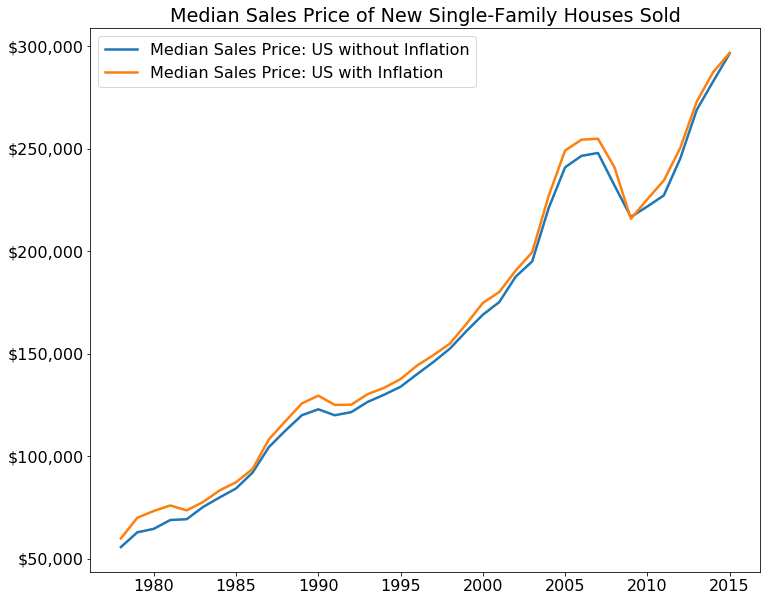

In [410]:
fig, ax = plt.subplots(1, figsize=(12,10))
ax.plot(df.Year, df.iloc[:,1], label=my_columns[0], linewidth=2.5, linestyle=line_style[0])
ax.plot(df.Year, df.iloc[:,1]*(1 + (inflation_df["Average Rate"].values / 100)), label=my_columns[0], linewidth=2.5, linestyle=line_style[0])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.legend(['Median Sales Price: US without Inflation', 'Median Sales Price: US with Inflation'])
plt.title("Median Sales Price of New Single-Family Houses Sold")
plt.savefig('US_Median_inflation')

In [379]:
df_income_single = pd.read_csv("Single_Earner_Median_Mean_Income.csv", na_values='(NA)')
df_income_double = pd.read_csv("Two_Earner_Median_Mean_Income.csv",  na_values='(NA)')

df_income_single = df_income_single.dropna(how='any')
df_income_double = df_income_double.dropna(how='any')

dates = np.arange(1967, 2018 + 1, 1)

df_income_single.Year = dates[::-1]
df_income_double.Year = dates[::-1]


df_income_double_house = df_income_double[(df_income_double['Year'] >= 1978) & (df_income_double['Year'] <= 2015)].iloc[::-1]
df_income_single_house = df_income_single[(df_income_single['Year'] >= 1978) & (df_income_single['Year'] <= 2015)].iloc[::-1]

Median and Mean Income Table F-12:
https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-families.html

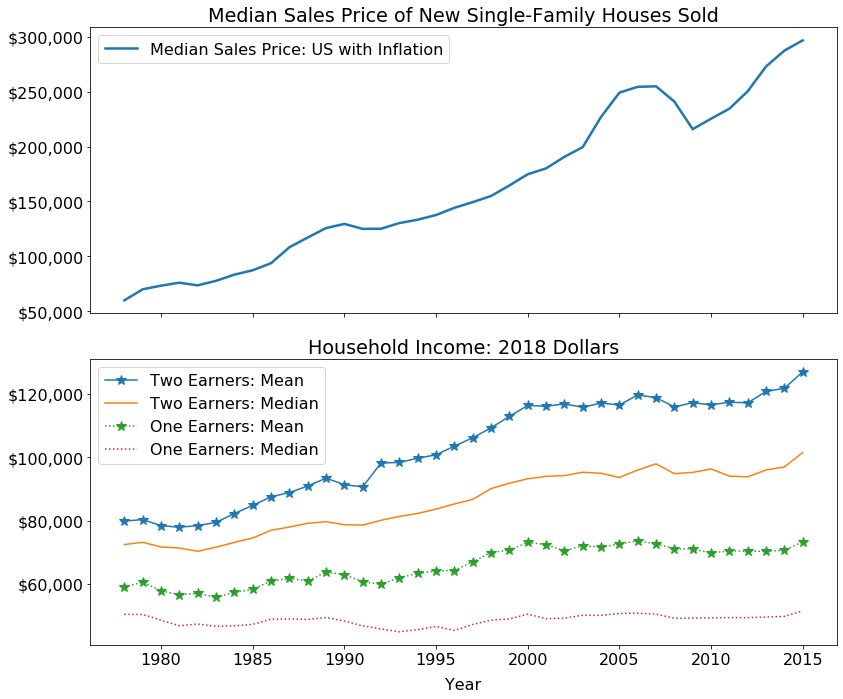

In [413]:
fig, axs = plt.subplots(2, sharex=True,figsize=(12,10))

# axs[0].plot(df.Year, df.iloc[:,1], label=my_columns[1], linewidth=2.5, linestyle=line_style[0], label='Median Sales Price: US without Inflation')
axs[0].plot(df.Year, df.iloc[:,1]*(1 + (inflation_df["Average Rate"].values / 100)), linewidth=2.5, linestyle=line_style[0], label='Median Sales Price: US with Inflation') 
axs[0].legend()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axs[0].yaxis.set_major_formatter(tick)
axs[1].yaxis.set_major_formatter(tick)

axs[1].plot(df.Year, df_income_double_house["Mean 2018 Dollars"], label="Two Earners: Mean", marker ="*", markersize=10 )
axs[1].plot(df.Year, df_income_double_house["Median 2018 Dollars"],  label="Two Earners: Median" )
axs[1].plot(df.Year, df_income_single_house["Mean 2018 Dollars"], label="One Earners: Mean", linestyle=":", marker ="*", markersize=10)
axs[1].plot(df.Year, df_income_single_house["Median 2018 Dollars"], label="One Earners: Median", linestyle=":")

axs[1].legend()

plt.xlabel('Year', labelpad=10)
# plt.ylabel('Median Price', labelpad=10)
axs[0].set_title('Median Sales Price of New Single-Family Houses Sold')
axs[1].set_title("Household Income: 2018 Dollars")
plt.autoscale(enable=True, axis='both', tight=None)
plt.tight_layout()
plt.savefig("Median_House_Median_Double_Income.png")

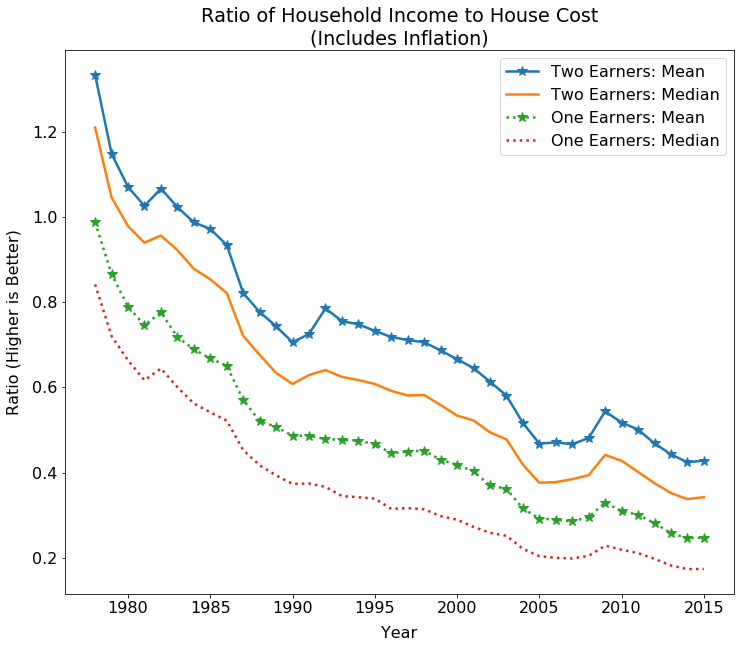

In [412]:
scaled_median_income_two = df_income_double_house["Median 2018 Dollars"]
scaled_mean_income_two = df_income_double_house["Mean 2018 Dollars"]

scaled_median_income_one = df_income_single_house["Median 2018 Dollars"]
scaled_mean_income_one = df_income_single_house["Mean 2018 Dollars"]


scaled_median_house = df.iloc[:,1]*(1 + (inflation_df["Average Rate"].values / 100))


fig, ax = plt.subplots(1, figsize=(12,10))
ax.plot(df.Year, scaled_mean_income_two.values/scaled_median_house.values , linewidth=2.5, marker ="*", markersize=10,  label="Two Earners: Mean" )
ax.plot(df.Year, scaled_median_income_two.values/scaled_median_house.values , linewidth=2.5, label="Two Earners: Median")


ax.plot(df.Year, scaled_mean_income_one.values/scaled_median_house.values , linewidth=2.5,   label="One Earners: Mean", linestyle=":", marker ="*", markersize=10)
ax.plot(df.Year, scaled_median_income_one.values/scaled_median_house.values , linewidth=2.5, label="One Earners: Median",  linestyle=":")

plt.xlabel('Year', labelpad=10)
plt.ylabel('Ratio (Higher is Better)', labelpad=10)
plt.title('Ratio of Household Income to House Cost' + "\n(Includes Inflation)");
plt.legend()
plt.savefig("Ratio_income_house_earners.png")